In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
import pandas as pd

df = pd.read_csv('../data/BrentOilPrices.csv')
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
df.set_index('Date', inplace=True)
df.dropna(inplace=True)
print(df.isnull().sum())

Price    0
dtype: int64


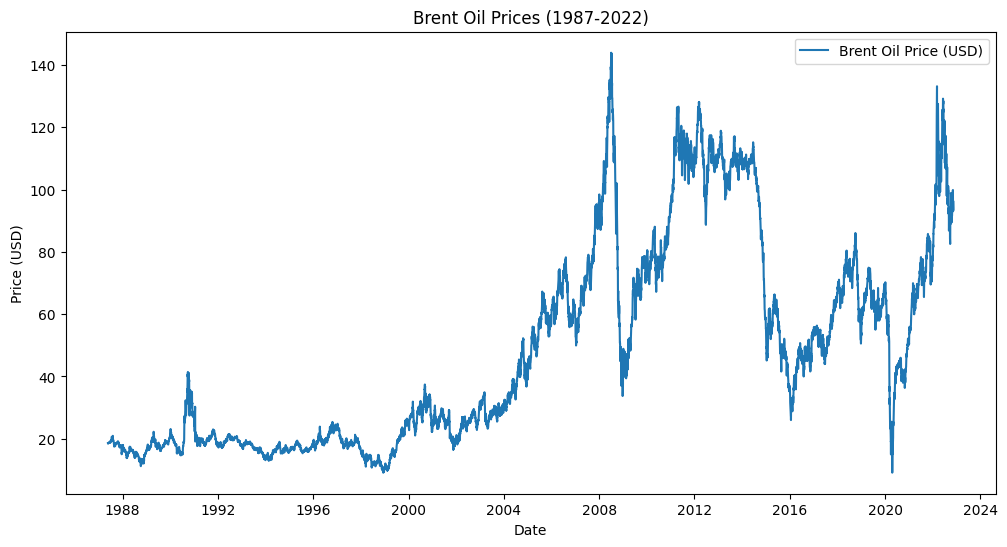

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Brent Oil Price (USD)')
plt.title('Brent Oil Prices (1987-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig('../docs/price_plot.png')
plt.show()

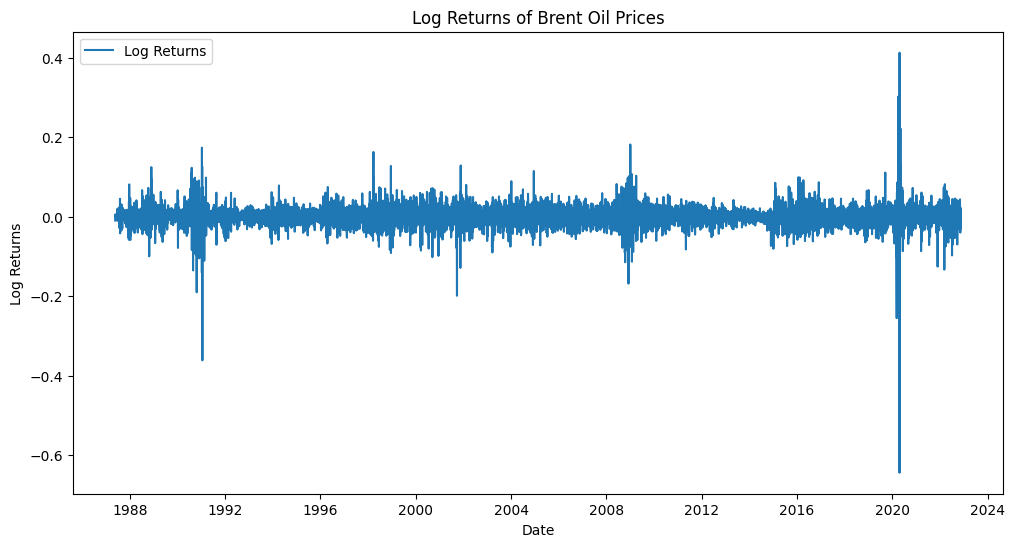

In [7]:
df['Log_Returns'] = np.log(df['Price']).diff()
plt.figure(figsize=(12, 6))
plt.plot(df['Log_Returns'], label='Log Returns')
plt.title('Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.savefig('../docs/log_returns_plot.png')
plt.show()

In [8]:
result = adfuller(df['Log_Returns'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Stationary' if result[1] < 0.05 else 'Non-stationary')

ADF Statistic: -16.42711349448589
p-value: 2.4985801611428892e-29
Stationary


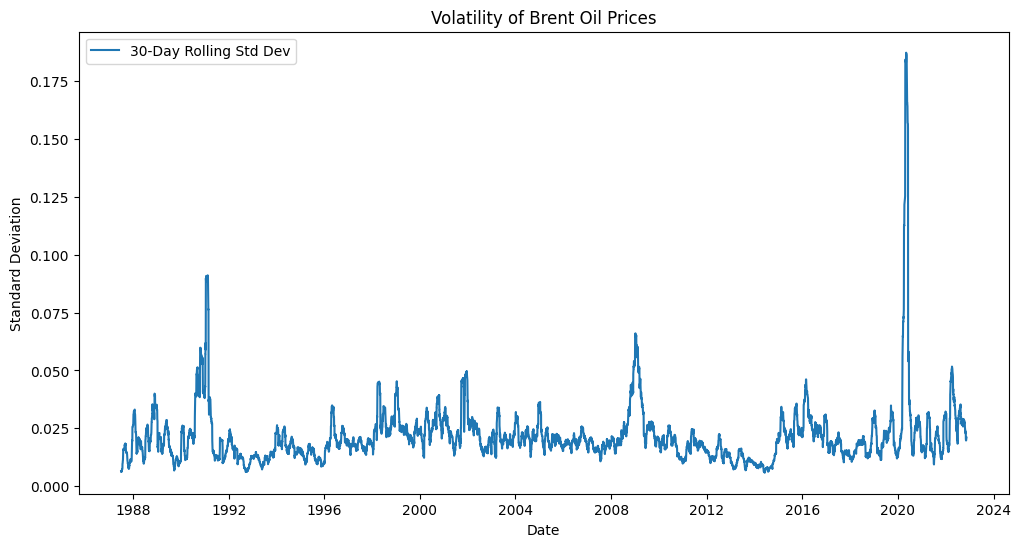

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Log_Returns'].rolling(window=30).std(), label='30-Day Rolling Std Dev')
plt.title('Volatility of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.savefig('../docs/volatility_plot.png')
plt.show()